Ngưỡng tìm được:  96.68656001366806


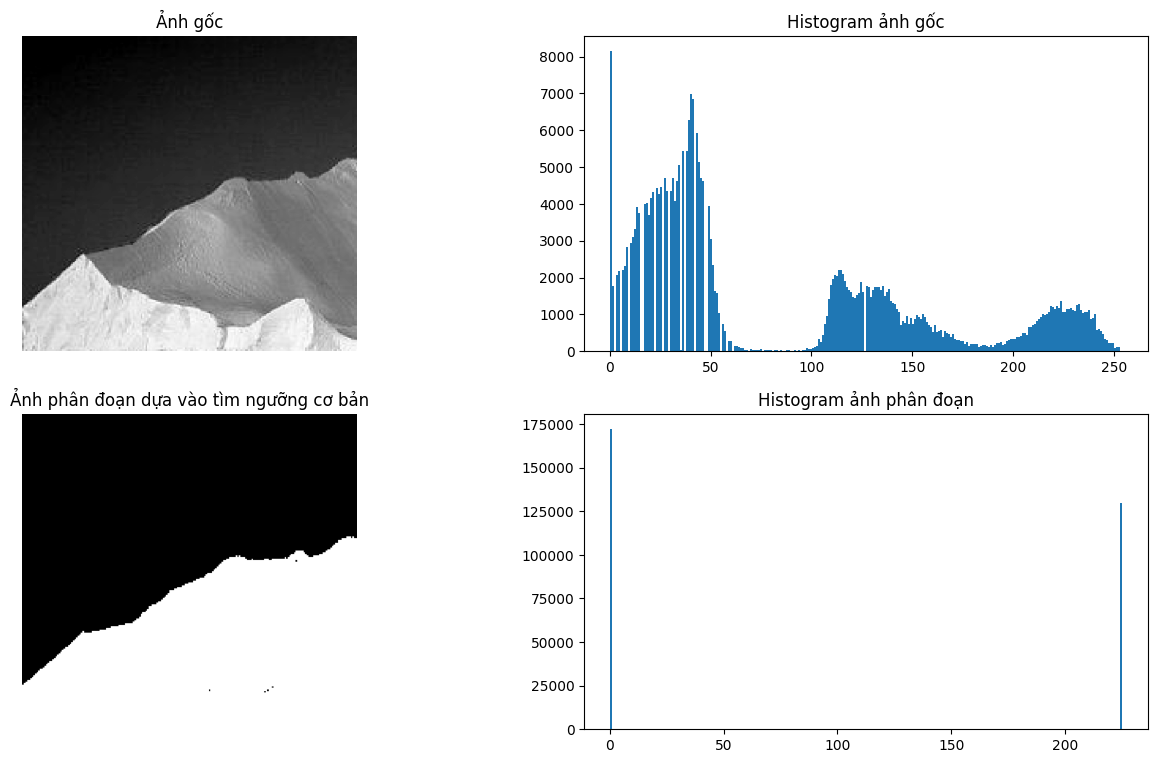

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def Tim_nguong_toan_cuc(img):
    t=np.mean(img)
    g1 = []
    g2 = []
    m,n = img.shape
    while (True):
        for i in range(m):
            for j in range(n):
                if (img[i,j] < t):
                    g1.append(img[i,j])
                else:
                    g2.append(img[i,j])
        mu1 = np.mean(g1)
        mu2 = np.mean(g2)
        t = ((mu1+ mu2)/2)
        t0 = t
        delta_t = abs(t-t0)
        if(delta_t < 1):
            break
    print("Ngưỡng tìm được: ",t)
    return t

def phan_doan_bang_cat_nguong(img,nguong):
    m, n = img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_doan_cat_nguong[i,j] = 0
            else:
                img_phan_doan_cat_nguong[i,j] = 225
    return img_phan_doan_cat_nguong

if __name__ == "__main__":
    img_goc = cv2.imread("test2.tif",0)
    T = Tim_nguong_toan_cuc(img_goc)
    img_phan_doan_global = phan_doan_bang_cat_nguong(img_goc,T)

    fig2 = plt.figure(figsize=(16, 9))
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)

    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    ax2.hist(img_goc.flatten(),bins=256)
    ax2.set_title('Histogram ảnh gốc')

    ax3.imshow(img_phan_doan_global, cmap='gray')
    ax3.set_title('Ảnh phân đoạn dựa vào tìm ngưỡng cơ bản')
    ax3.axis('off')

    ax4.hist(img_phan_doan_global.flatten(), bins=256)
    ax4.set_title('Histogram ảnh phân đoạn')
    plt.show()

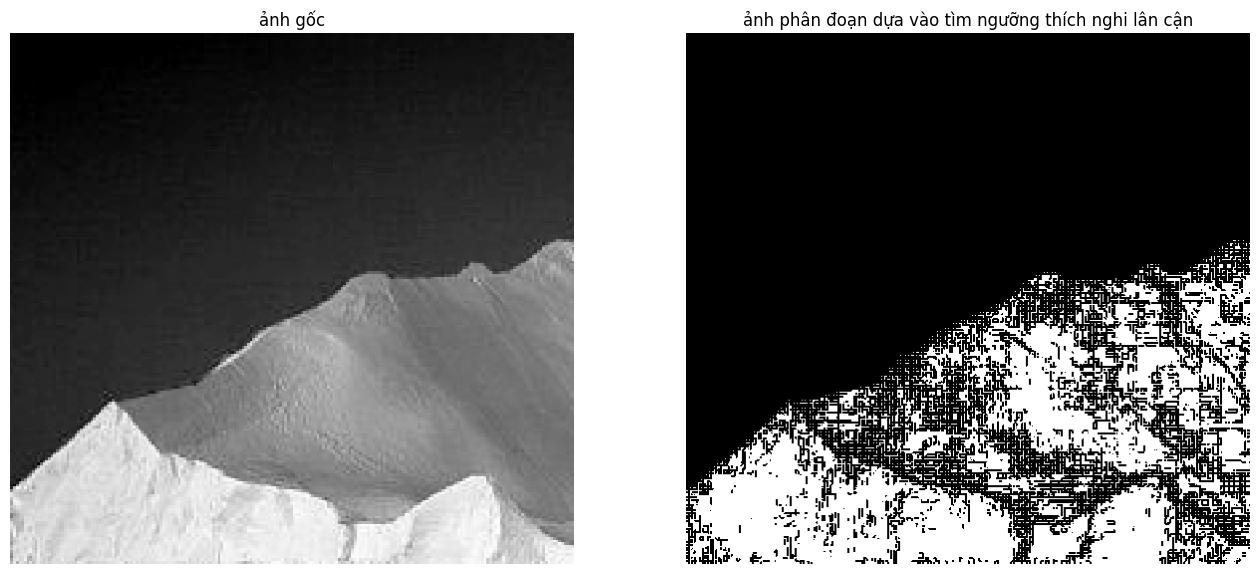

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def Phan_doan_lan_can(img, ksize):
    m, n = img.shape
    img_ket_qua_phan_doan = np.zeros([m, n])
    h=(ksize -1) // 2
    a=20
    b=1
    padded_img = np.pad(img, (h, h), mode='reflect')
    mG = np.mean(padded_img)
    for i in range(m):
        for j in range(n):
            vung_anh_kich_thuoc_k = padded_img[i:i+ksize,j:j+ksize]
            Do_lech_chuan = np.std(vung_anh_kich_thuoc_k)
            T= a*Do_lech_chuan + b*mG
            if padded_img[i, j] > T:
                img_ket_qua_phan_doan[i, j] = 255
            else:
                img_ket_qua_phan_doan[i, j] = 0
    return img_ket_qua_phan_doan

if __name__ == "__main__":
    img_goc = cv2.imread('test2.tif', 0)

    ksize =3
    img_ket_qua = Phan_doan_lan_can(img_goc, ksize)

    fig = plt.figure(figsize=(16, 9))
    (ax1, ax2) = fig.subplots(1, 2)
    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title("ảnh gốc")
    ax1.axis("off")

    ax2.imshow(img_ket_qua, cmap='gray')
    ax2.set_title("ảnh phân đoạn dựa vào tìm ngưỡng thích nghi lân cận")
    ax2.axis("off")

    plt.show()

Ngưỡng tìm được 97


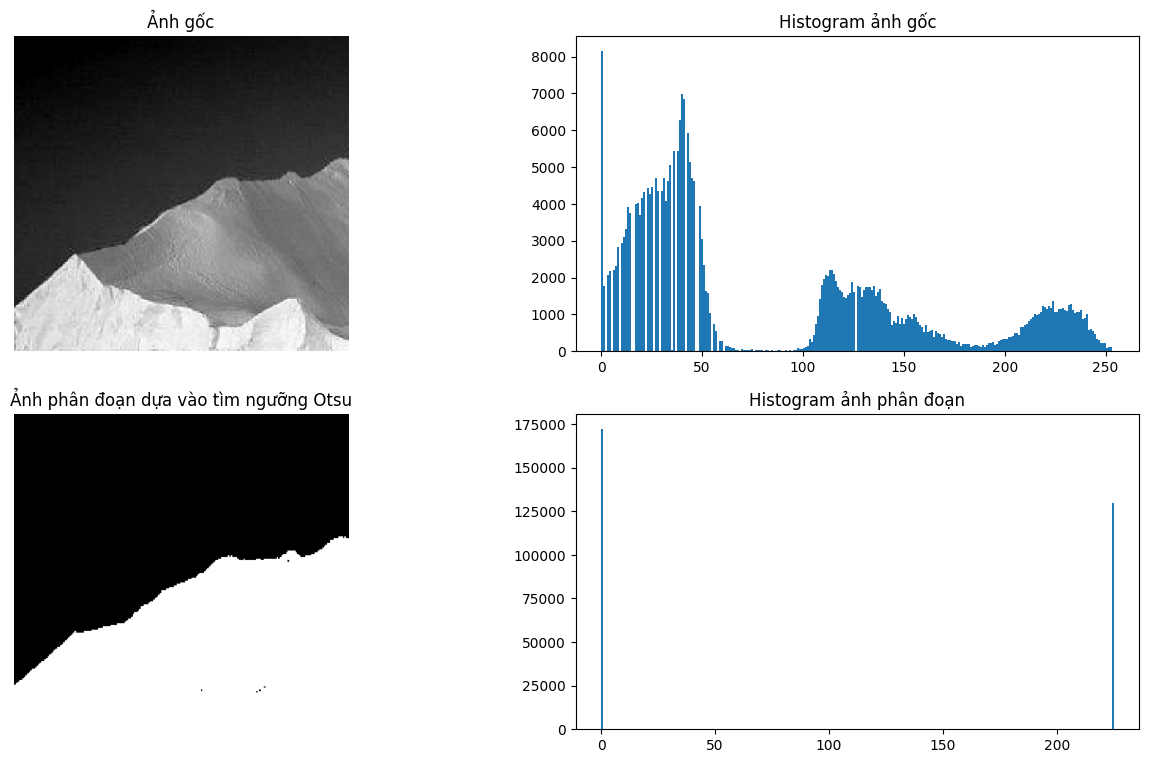

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def otsu(img):
    phuong_sai_t = 0
    M,N = img.shape
    mG = np.mean(img)

    for nguong in range(256):
        Tong_gt_xam_A = 1
        Tong_gt_xam_B = 1
        Tong_pixel_A = 1
        Tong_pixel_B = 1
        for i in range(M):
            for j in range(N):
                if (img[i,j] >= nguong):
                    Tong_pixel_A = Tong_pixel_A + 1
                    Tong_gt_xam_A = Tong_gt_xam_A + img[i,j]
                else:
                    Tong_pixel_B = Tong_pixel_B + 1
                    Tong_gt_xam_B = Tong_gt_xam_B + img[i,j]

        P1 = Tong_pixel_A/(M*N)
        P2 = Tong_pixel_B/(M*N)
        m1 = Tong_gt_xam_A/Tong_pixel_A
        m2 = Tong_gt_xam_B/Tong_pixel_B
        phuong_sai = P1*((m1-mG)**2)+P2*((m2-mG)**2)

        if (phuong_sai > phuong_sai_t):
            phuong_sai_t = phuong_sai
            nguong_toi_uu = nguong

    print("Ngưỡng tìm được", nguong_toi_uu)
    return nguong_toi_uu

def phan_doan_bang_cat_nguong(img,nguong):
    m, n = img.shape
    img_phan_doan_cat_nguong = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if (img[i,j] < nguong):
                img_phan_doan_cat_nguong[i,j] = 0
            else:
                img_phan_doan_cat_nguong[i,j] = 225
    return img_phan_doan_cat_nguong

if __name__ == "__main__":

    img_goc = cv2.imread('test2.tif', 0)
    nguong= otsu(img_goc)
    img_phan_doan=phan_doan_bang_cat_nguong(img_goc,nguong)

    fig2 = plt.figure(figsize=(16, 9))
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)

    ax1.imshow(img_goc, cmap='gray')
    ax1.set_title('Ảnh gốc')
    ax1.axis('off')

    ax2.hist(img_goc.flatten(), bins=256)
    ax2.set_title('Histogram ảnh gốc')

    ax3.imshow(img_phan_doan, cmap='gray')
    ax3.set_title('Ảnh phân đoạn dựa vào tìm ngưỡng Otsu')
    ax3.axis('off')

    ax4.hist(img_phan_doan.flatten(), bins=256)
    ax4.set_title('Histogram ảnh phân đoạn')
    plt.show()

In [ ]:
# Evaluation Metrics
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import sobel
from scipy.stats import entropy

def evaluate_segmentation(original, segmented):
    metrics = {}
    # Global Contrast
    foreground = original[segmented == 255]
    background = original[segmented == 0]
    contrast = abs(foreground.mean() - background.mean()) if len(foreground) > 0 and len(background) > 0 else 0
    metrics["Global Contrast"] = contrast
    # Entropy
    unique, counts = np.unique(segmented, return_counts=True)
    probabilities = counts / counts.sum()
    metrics["Entropy"] = entropy(probabilities)
    # Boundary Sharpness
    edges = sobel(segmented)
    sharpness = edges.mean()
    metrics["Boundary Sharpness"] = sharpness
    return metrics

Segmentation Evaluation Metrics:

Global Thresholding:
  Global Contrast: 0.0000
  Entropy: 0.6832
  Boundary Sharpness: 0.8611

Adaptive Thresholding:
  Global Contrast: 118.4256
  Entropy: 0.5635
  Boundary Sharpness: 32.3908

Otsu's Method:
  Global Contrast: 0.0000
  Entropy: 0.6832
  Boundary Sharpness: 0.8611


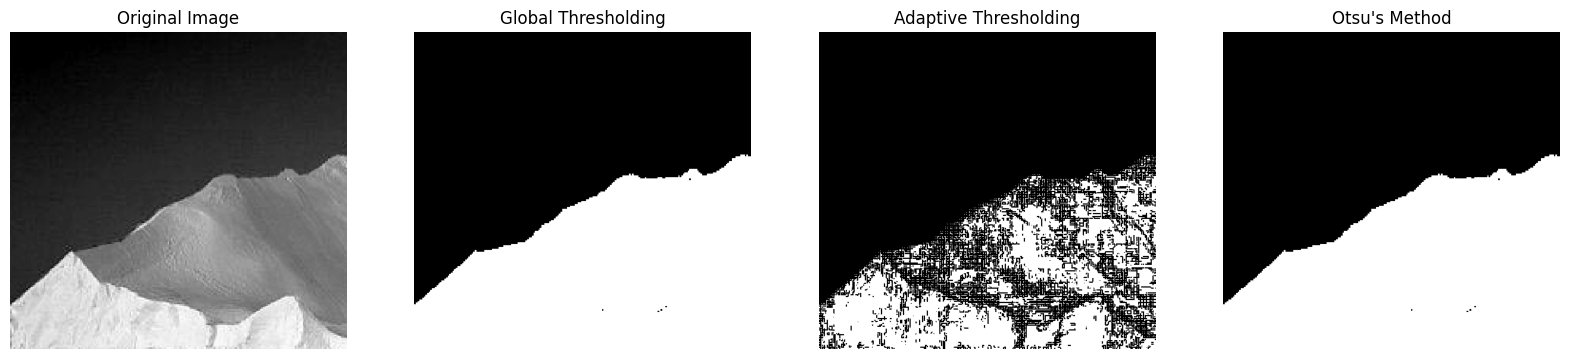

In [ ]:
img_goc = cv2.imread("test2.tif", 0)
methods = {
    "Global Thresholding": img_phan_doan_global,
    "Adaptive Thresholding": img_ket_qua,
    "Otsu's Method": img_phan_doan
}

metrics = {}
for method, result in methods.items():
    metrics[method] = evaluate_segmentation(img_goc, result)

print("Segmentation Evaluation Metrics:")
for method, values in metrics.items():
    print(f"\n{method}:")
    for key, value in values.items():
        print(f"  {key}: {value:.4f}")


fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(img_goc, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

for ax, (method, result) in zip(axes[1:], methods.items()):
    ax.imshow(result, cmap='gray')
    ax.set_title(method)
    ax.axis("off")

plt.show()